In [10]:
!git clone https://github.com/chaudharykapil/Anomaly_detection_in_video.git

Cloning into 'Anomaly_detection_in_video'...
remote: Enumerating objects: 15382, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 15382 (delta 0), reused 5 (delta 0), pack-reused 15376
Receiving objects: 100% (15382/15382), 1.06 GiB | 29.10 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Updating files: 100% (15345/15345), done.


In [100]:
from Anomaly_detection_in_video.lib import DataProvider
from Anomaly_detection_in_video import Config
from Anomaly_detection_in_video.models import STAE
from Anomaly_detection_in_video.lib import Helpers
import numpy as np
from matplotlib import pyplot as plt


In [22]:
DATASET_PATH = "/home/hashem/Desktop/GB/train/"
SINGLE_TEST_PATH = "./Anomaly_detection_in_video/datasets/avenue/testing/frames"
RELOAD_DATASET = False
RELOAD_TESTSET = True
RELOAD_MODEL = False
CACHE_PATH = "cache"
MODEL_PATH = "./Anomaly_detection_in_video/notebooks/lstmautoencoder/model.hdf5"
BATCH_SIZE = 1
EPOCHS = 1

In [158]:
def plotImage(ims,r=2,c=5):

    # create figure
    fig = plt.figure(figsize=(60, 42))

    # setting values to rows and column variables
    rows = r
    columns = c
    for y in range(len(ims)):
        for x in range(ims[y].shape[0]):
          # Adds a subplot at the 1st position
          fig.add_subplot(rows, columns, 10*y + x+1)

          # showing image
          plt.imshow(ims[y][x])
          plt.axis('off')
          plt.title(f"frame {x+1}")

In [78]:
dataProvider = DataProvider
images = np.array(dataProvider.get_test_set(SINGLE_TEST_PATH,1))
#images = dataProvider.get_n_video_frames(Config.SINGLE_TEST_PATH)
print("got data")


01_frames
True
got data


In [194]:
x_axis_values = []
min_et = 1e9
max_et = 0
threshold = 60
detected_frames = []
x = np.zeros((1, 10, 256, 256, 1))
def evaluate_test(n2,n1=0):
    # seq = STAE.get_model(re=Config.RELOAD_MODEL)
    global dataProvider,min_et,max_et,images,x
    seq = STAE.get_my_model(MODEL_PATH)
    print(seq.predict)
    print("got model")
    for i in range(n1,n2):
      x = np.zeros((1, 10, 256, 256, 1))

      x[0] = images[i]


      output = seq.predict(x)
      print(i," == ")
      print()
      is_detect = False
      for j in range(0,10):
          et = np.sum(np.square(np.subtract(x[0,:,:,j],output[0,:,:,j])))
          min_et=min(min_et,et)
          max_et=max(max_et,et)
          x_axis_values.append(et)
          if(et >= threshold):
              is_detect = True
      if(is_detect):
          detected_frames.append(x[0])


n1 = 0
n2 = images.shape[0]
evaluate_test(n1=n1,n2 = n2)

<bound method Model.predict of <keras.src.engine.sequential.Sequential object at 0x7e80a6e74fa0>>
got model
1/1 [==============================] - 9s 9s/step
0  == 

1/1 [==============================] - 6s 6s/step
1  == 

1/1 [==============================] - 6s 6s/step
2  == 

1/1 [==============================] - 7s 7s/step
3  == 

1/1 [==============================] - 8s 8s/step
4  == 

1/1 [==============================] - 8s 8s/step
5  == 

1/1 [==============================] - 7s 7s/step
6  == 

1/1 [==============================] - 8s 8s/step
7  == 

1/1 [==============================] - 9s 9s/step
8  == 

1/1 [==============================] - 6s 6s/step
9  == 

1/1 [==============================] - 6s 6s/step
10  == 

1/1 [==============================] - 8s 8s/step
11  == 

1/1 [==============================] - 6s 6s/step
12  == 

1/1 [==============================] - 7s 7s/step
13  == 

1/1 [==============================] - 7s 7s/step
14  == 

1/1 [============

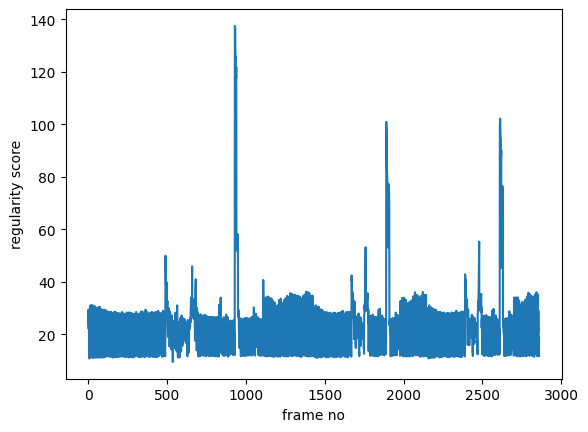

2841


In [198]:
x_val = x_axis_values
x_val =1.0 - (x_val - min_et)/max_et
x_val = Helpers.movingaverage(x_val,20)
import matplotlib.pyplot as plt
plt.plot(list(range(n1*10,n2*10)),x_axis_values)
plt.ylabel('regularity score')
plt.xlabel("frame no")
plt.show()
print(len(x_val))

In [199]:
len(detected_frames)
# plotImage(detected_frames,r=len(detected_frames)*10//5,c=5)

105

In [200]:
import cv2
import numpy as np
import imageio
def frame2Vid(frames,name):

    frames = [np.squeeze(frame*255).astype(np.uint8) for frame in frames]
    print(len(frames))

    # Specify the output GIF filename
    output_filename = f'{name}.gif'

    # Save the frames as a GIF using imageio
    imageio.mimsave(output_filename, frames, duration=0.1)  # Adjust duration as needed

    print(f'GIF created: {output_filename}')


In [201]:
ttl = detected_frames[0]
for d in detected_frames[1:]:
    ttl = np.concatenate((ttl,d),axis=0)
frame2Vid(ttl,'final_gif')

1050
GIF created: final_gif.gif


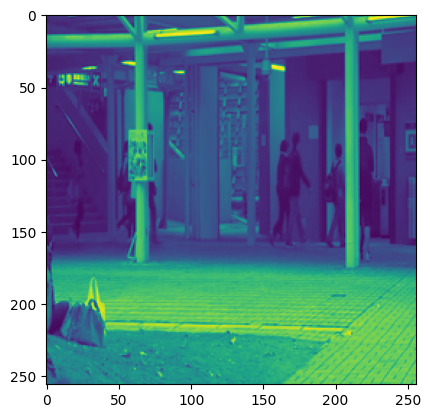

In [146]:
t = (detected_frames[0][0]*255).astype(np.uint8)
plt.imshow(t)